In [1]:
import daspi as dsp
DPI = 120
dsp.STR._username_ = 'j4ggr'
dsp.__version__

'Not installed'

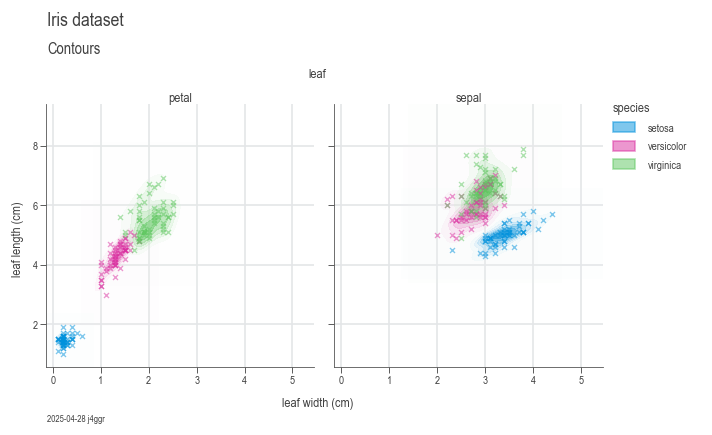

In [2]:
import daspi as dsp
df = dsp.load_dataset('iris')

chart = dsp.MultivariateChart(
        source=df,
        target='length',
        feature='width',
        hue='species',
        col='leaf',
        markers=('x',)
    ).plot(
        dsp.GaussianKDEContour
    ).plot(
        dsp.Scatter
    ).label(
        fig_title='Iris dataset',
        sub_title='Contours',
        feature_label='leaf width (cm)',
        target_label='leaf length (cm)',
        info=True
    )

chart.save('./docs/img/iris_contour_size-leaf-species.png', dpi=DPI)

Logo

#00a2d1 #00b8c2


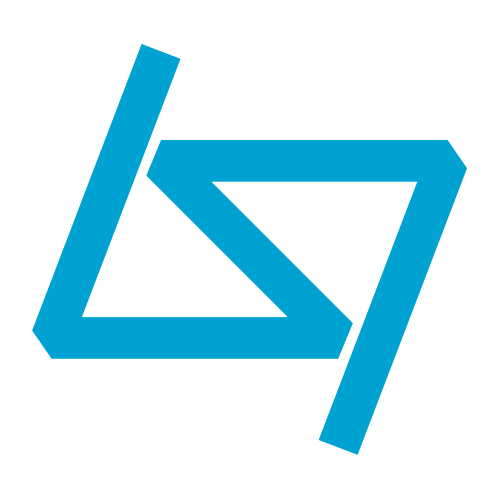

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import daspi as dsp

plt.rcParams.update({
    "figure.facecolor": (1., 1., 1., 1.),
    "axes.facecolor": (1., 1., 1., 1.),
    "savefig.facecolor": (1., 1., 1., 1.),
})

PHI = (1 + 5**0.5) / 2
SHORT = 1 / (1 + PHI)
LONG = PHI / (1 + PHI)

edges = np.array([
    (SHORT, 1+SHORT),
    (0, SHORT),
    (1, SHORT),
    (SHORT, 1),
    (1+SHORT, 1),
    (1, 0)])

color = dsp.COLOR.PALETTE[47]
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(
    edges[:, 0],
    edges[:, 1],
    linewidth=25,
    color=color,
    solid_capstyle='butt',
    solid_joinstyle='bevel')
ax.axis('off')
ax.set_aspect('equal')
ax.margins(0.1, 0.1)
fig.savefig(f'./docs/img/logo_base.svg', transparent=True)
print(dsp.COLOR.PALETTE[47], dsp.COLOR.PALETTE[43])

             parallel perpendicular
n_samples          20            20
n_missing           0             0
n_ok               18            20
n_nok               2             0
n_errors            0             0
ok            90.00 %      100.00 %
nok           10.00 %        0.00 %
nok_norm       8.01 %        3.73 %
nok_fit        7.24 %        5.77 %
min               8.5          17.5
max              83.0          73.0
R                74.5          55.5
mean           42.935        48.485
median          40.75          52.5
std         22.666583     17.359489
sem          5.068402        3.8817
dist_name     lognorm      logistic
p_ks         0.964797      0.744326
p_ad         0.754044      0.098371
excess      -0.900801     -1.236078
p_excess     0.288757      0.072573
skew          0.19252     -0.377538
p_skew       0.690373      0.438723
strategy         norm          norm
lcl        -25.064748     -3.593468
ucl        110.934748    100.563468
lsl                 0       

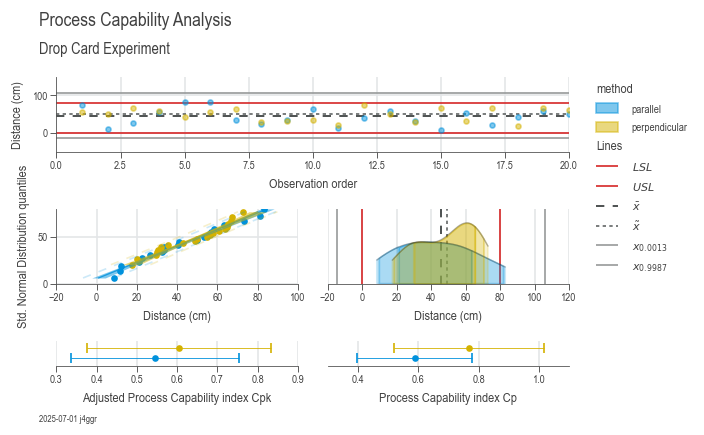

In [5]:
import daspi as dsp
import pandas as pd

df = dsp.load_dataset('drop_card')
spec_limits = dsp.SpecLimits(0, float(df.loc[0, 'usl']))
target = 'distance'

chart = dsp.ProcessCapabilityAnalysisCharts(
        source=df,
        target=target,
        spec_limits=spec_limits,
        hue='method'
    ).plot(
    ).stripes(
    ).label(
        fig_title='Process Capability Analysis',
        sub_title='Drop Card Experiment',
        target_label='Distance (cm)',
        info=True
    )

samples_parallel = df[df['method']=='parallel'][target]
samples_series = df[df['method']=='perpendicular'][target]
df_e = pd.concat([
    dsp.ProcessEstimator(samples_parallel, spec_limits).describe(),
    dsp.ProcessEstimator(samples_series, spec_limits).describe()],
    axis=1,
    ignore_index=True,
).rename(
    columns={0: 'parallel', 1: 'perpendicular'}
)
print(df_e)